In [188]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [190]:
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [191]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [192]:
print(df[df.isna().any(axis=1)]) # Show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

In [193]:
df = df.drop(columns=['ApplicationDate'])

df_encoded = pd.get_dummies(df, drop_first=True) # One-hot encoding categorical variables

# Point-Biserial Correlation for continuous features with binary target (LoanApproved)
point_biserial_correlations = {}

for column in numeric_columns:
    correlation, p_value = pointbiserialr(df_encoded[column], df_encoded['LoanApproved_1'])
    point_biserial_correlations[column] = correlation

# Chi-Square Test of Independence for categorical features with binary target (without LoanApproved)
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory'
]
chi_square_p_values = {}

encoded_columns = [col for col in df_encoded.columns if col not in categorical_columns]

for column in encoded_columns:
    contingency_table = pd.crosstab(df_encoded[column], df_encoded['LoanApproved_1'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values[column] = p_value

In [194]:
# Convert the point-biserial correlation dictionary to a DataFrame
point_biserial_correlations_df = pd.DataFrame(list(point_biserial_correlations.items()), columns=['Feature', 'Correlation'])

# Print the resulting DataFrame
print("\nPoint-Biserial Correlation for continuous features:")
point_biserial_correlations_df


Point-Biserial Correlation for continuous features:


,Feature,Correlation
0,Age,0.141029
1,AnnualIncome,0.597900
2,CreditScore,0.142000
3,Experience,0.140755
4,LoanAmount,-0.239496
5,LoanDuration,-0.094558
6,NumberOfDependents,0.001717
7,MonthlyDebtPayments,-0.070415
8,CreditCardUtilizationRate,-0.010466
9,NumberOfOpenCreditLines,-0.004769


In [195]:
# Convert the chi-square p-values dictionary to a DataFrame
chi_square_p_values_df = pd.DataFrame(list(chi_square_p_values.items()), columns=['Feature', 'P-Value'])

# Print the resulting DataFrame
print("\nChi-Square p-values:")
chi_square_p_values_df


Chi-Square p-values:


,Feature,P-Value
0,Age,1.343140e-68
1,AnnualIncome,7.169535e-16
2,CreditScore,2.678344e-35
3,Experience,2.126412e-69
4,LoanAmount,7.675432e-01
...,...,...
76,PaymentHistory_42,1.000000e+00
77,PaymentHistory_43,9.709007e-01
78,PaymentHistory_44,1.000000e+00
79,PaymentHistory_45,5.405297e-01


In [196]:
# Set significance level (alpha) for correlation
alpha = 0.05

# Filter features where the p-value is less than alpha (significantly correlated)
significant_features = chi_square_p_values_df[chi_square_p_values_df['P-Value'] < alpha]

# Print the significant features
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                           Feature       P-Value
0                              Age  1.343140e-68
1                     AnnualIncome  7.169535e-16
2                      CreditScore  2.678344e-35
3                       Experience  2.126412e-69
5                     LoanDuration  2.764140e-44
12            PreviousLoanDefaults  3.163768e-20
13           LengthOfCreditHistory  4.035107e-37
18                   MonthlyIncome  4.439482e-16
20                        NetWorth  1.056706e-02
25                       RiskScore  0.000000e+00
26  EmploymentStatus_Self-Employed  1.498971e-04
27     EmploymentStatus_Unemployed  2.665115e-07
28         EducationLevel_Bachelor  2.284575e-09
29        EducationLevel_Doctorate  3.440071e-50
30      EducationLevel_High School  1.343826e-91
31           EducationLevel_Master  1.372586e-55
35       HomeOwnershipStatus_Other  1.511918e-04
37        HomeOwnershipStatus_Rent  1.386023e-02
38             BankruptcyHist

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

LoanApproved
0    76.1
1    23.9
Name: count, dtype: float64


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


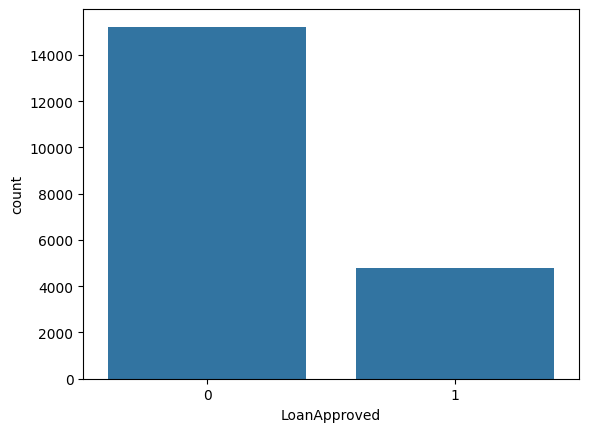

In [197]:
print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

### CART

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1'])     # Features
target = df_encoded['LoanApproved_1']                    # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test,target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.99

 Confusion Matrix:
[[3789   22]
 [  28 1161]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3811
        True       0.98      0.98      0.98      1189

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8934

 Confusion Matrix:
[[3549  262]
 [ 271  918]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3811
        True       0.78      0.77      0.78      1189

    accuracy                           0.89      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.89      0.89      0.89      5000



In [ ]:
# List of features extracted from the given data
selected_features = [
    "Age", "AnnualIncome", "CreditScore", "Experience", "LoanDuration",
    "PreviousLoanDefaults", "LengthOfCreditHistory", "MonthlyIncome",
    "NetWorth", "EmploymentStatus_Self-Employed",
    "EmploymentStatus_Unemployed", "EducationLevel_Bachelor",
    "EducationLevel_Doctorate", "EducationLevel_High School",
    "EducationLevel_Master", "HomeOwnershipStatus_Other",
    "HomeOwnershipStatus_Rent", "BankruptcyHistory_1", 
    "PaymentHistory_17", "PaymentHistory_26", "PaymentHistory_37", 
    "PaymentHistory_38", "PaymentHistory_39", "PaymentHistory_41"
]

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8224

 Confusion Matrix:
[[3403  408]
 [ 480  709]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.89      0.88      3811
        True       0.63      0.60      0.61      1189

    accuracy                           0.82      5000
   macro avg       0.76      0.74      0.75      5000
weighted avg       0.82      0.82      0.82      5000



### C5.0

In [ ]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

,max_depth,max_leaf_nodes,accuracy
89,10,10,0.8744
32,4,7,0.8744
34,4,9,0.8744
35,4,10,0.8744
39,5,5,0.8744
...,...,...,...
5,1,7,0.8212
4,1,6,0.8212
3,1,5,0.8212
2,1,4,0.8212


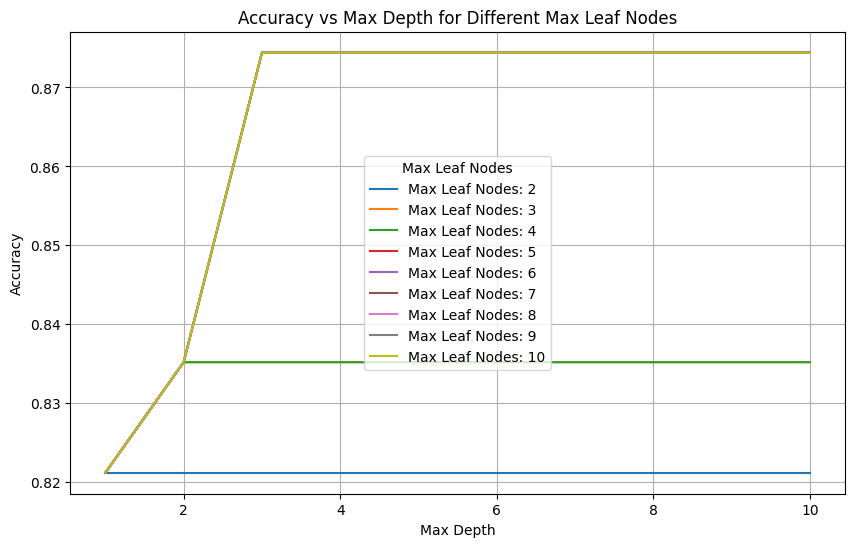

In [ ]:
import matplotlib.pyplot as plt

# Plotting a line graph for accuracy based on max_depth and max_leaf_nodes
plt.figure(figsize=(10, 6))

for max_leaf_nodes in results_df['max_leaf_nodes'].unique():
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        label=f"Max Leaf Nodes: {max_leaf_nodes}"
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes")
plt.grid(True)

# Show the plot
plt.show()


In [216]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         3.0000
max_leaf_nodes    5.0000
accuracy          0.8744
Name: 21, dtype: float64


In [217]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8744

 Confusion Matrix:
[[3550  261]
 [ 367  822]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      3811
        True       0.76      0.69      0.72      1189

    accuracy                           0.87      5000
   macro avg       0.83      0.81      0.82      5000
weighted avg       0.87      0.87      0.87      5000



In [218]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.875, 'TotalDebtToIncomeRatio <= 0.224\nentropy = 0.794\nsamples = 15000\nvalue = [11409, 3591]'),
 Text(0.25, 0.625, 'TotalDebtToIncomeRatio <= 0.116\nentropy = 0.983\nsamples = 5278\nvalue = [2236, 3042]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'entropy = 0.572\nsamples = 1550\nvalue = [210.0, 1340.0]'),
 Text(0.375, 0.375, 'InterestRate <= 0.23\nentropy = 0.995\nsamples = 3728\nvalue = [2026, 1702]'),
 Text(0.25, 0.125, 'entropy = 0.926\nsamples = 1842\nvalue = [628, 1214]'),
 Text(0.5, 0.125, 'entropy = 0.825\nsamples = 1886\nvalue = [1398, 488]'),
 Text(0.75, 0.625, 'TotalDebtToIncomeRatio <= 0.364\nentropy = 0.313\nsamples = 9722\nvalue = [9173, 549]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'entropy = 0.561\nsamples = 3656\nvalue = [3176.0, 480.0]'),
 Text(0.875, 0.375, 'entropy = 0.09\nsamples = 6066\nvalue = [5997, 69]')]

In [ ]:
# List of features extracted from the given data
selected_features = [
    "Age", "AnnualIncome", "CreditScore", "Experience", "LoanDuration",
    "PreviousLoanDefaults", "LengthOfCreditHistory", "MonthlyIncome",
    "NetWorth", "EmploymentStatus_Self-Employed",
    "EmploymentStatus_Unemployed", "EducationLevel_Bachelor",
    "EducationLevel_Doctorate", "EducationLevel_High School",
    "EducationLevel_Master", "HomeOwnershipStatus_Other",
    "HomeOwnershipStatus_Rent", "BankruptcyHistory_1", 
    "PaymentHistory_17", "PaymentHistory_26", "PaymentHistory_37", 
    "PaymentHistory_38", "PaymentHistory_39", "PaymentHistory_41"
]

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8374

 Confusion Matrix:
[[3729   82]
 [ 731  458]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.98      0.90      3811
        True       0.85      0.39      0.53      1189

    accuracy                           0.84      5000
   macro avg       0.84      0.68      0.72      5000
weighted avg       0.84      0.84      0.81      5000



In [219]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.875, 'TotalDebtToIncomeRatio <= 0.224\nentropy = 0.794\nsamples = 15000\nvalue = [11409, 3591]'),
 Text(0.25, 0.625, 'TotalDebtToIncomeRatio <= 0.116\nentropy = 0.983\nsamples = 5278\nvalue = [2236, 3042]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'entropy = 0.572\nsamples = 1550\nvalue = [210.0, 1340.0]'),
 Text(0.375, 0.375, 'InterestRate <= 0.23\nentropy = 0.995\nsamples = 3728\nvalue = [2026, 1702]'),
 Text(0.25, 0.125, 'entropy = 0.926\nsamples = 1842\nvalue = [628, 1214]'),
 Text(0.5, 0.125, 'entropy = 0.825\nsamples = 1886\nvalue = [1398, 488]'),
 Text(0.75, 0.625, 'TotalDebtToIncomeRatio <= 0.364\nentropy = 0.313\nsamples = 9722\nvalue = [9173, 549]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'entropy = 0.561\nsamples = 3656\nvalue = [3176.0, 480.0]'),
 Text(0.875, 0.375, 'entropy = 0.09\nsamples = 6066\nvalue = [5997, 69]')]

### Random Forest